In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,Input,Flatten,Conv2DTranspose,Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
X_train = (X_train / 255)
X_test = (X_test / 255)
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [3]:
encoding_dim = 256

#encoding_dim = min(encoding_dim,8)
#placeholder
input_img = Input(shape=(32,32,3))

#encoder layers

encoder = Conv2D(6,(4,4),(1,1),activation='relu')(input_img)  #29*29*6
encoder = Conv2D(12,(8,8),(1,1),activation='relu')(encoder)     #22*22*12
encoder = Conv2D(24,(16,16),(1,1),activation='relu')(encoder)   #7*7*24
encoder = Conv2D(48,(2,2),(2,2),activation='relu')(encoder)    #3*3*48
encoder = Flatten()(encoder)                                   # 432
encoder = Dense(encoding_dim)(encoder)                          # 256

#decoder
decoder = Dense(432)(encoder)                                 #256
decoder = Reshape((3,3,48))(decoder)                           #3*3*48
decoder = Conv2DTranspose(24,(3,3),(2,2),activation='relu')(decoder)  #7*7*24
decoder = Conv2DTranspose(12,(16,16),(1,1),activation='relu')(decoder)  #22*22*12
decoder = Conv2DTranspose(6,(8,8),(1,1),activation='relu')(decoder)  #29*29*6
decoder = Conv2DTranspose(3,(4,4),(1,1),activation='sigmoid')(decoder)   #32*32*3

#model auto_encoder
auto_encoder = Model(inputs=input_img,outputs=decoder)
#
encoder_model = Model(inputs=input_img,outputs=encoder)
#compile
auto_encoder.compile(Adam(),tf.losses.mean_squared_error)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
auto_encoder.fit(X_train,X_train,64,20,shuffle=True)

Epoch 1/20
50000/50000 [==============================] - 13s 261us/sample - loss: 0.0315
Epoch 2/20
50000/50000 [==============================] - 10s 206us/sample - loss: 0.0209
Epoch 3/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.0185
Epoch 4/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.0173
Epoch 5/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.0153
Epoch 6/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.0145
Epoch 7/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.0141
Epoch 8/20
50000/50000 [==============================] - 10s 204us/sample - loss: 0.0137
Epoch 9/20
50000/50000 [==============================] - 10s 204us/sample - loss: 0.0134
Epoch 10/20
50000/50000 [==============================] - 10s 205us/sample - loss: 0.0131
Epoch 11/20
50000/50000 [==============================] - 10s 204us/sample - loss: 0.0127
Epoch 12

3
[0.29149866 0.10972302 0.05873129]


<IPython.core.display.Javascript object>


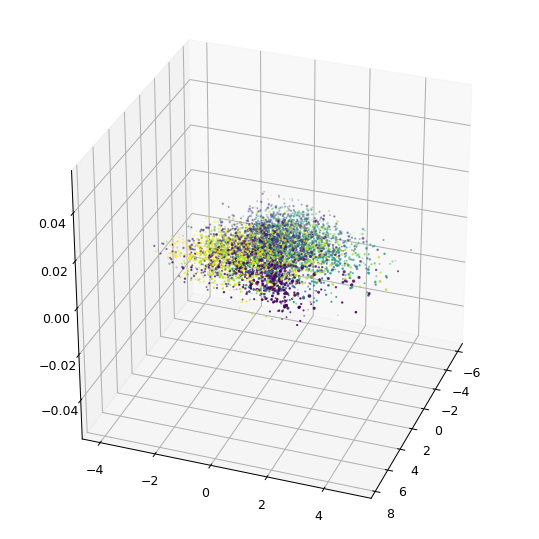

F:\Anaconda\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [5]:
%matplotlib notebook
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
encoded_imgs = encoder_model.predict(X_test)

pca = PCA(3)
pca.fit(encoded_imgs)
print(pca.n_components)
print(pca.explained_variance_ratio_)
encoded_imgs_pca = pca.transform(encoded_imgs)

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(encoded_imgs_pca[:,0],encoded_imgs_pca[:,1],encoded_imgs_pca[:,2],c=Y_test)
plt.show()

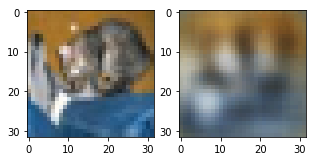

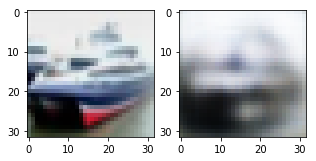

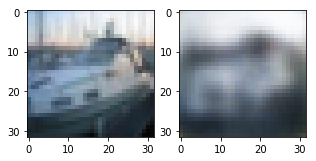

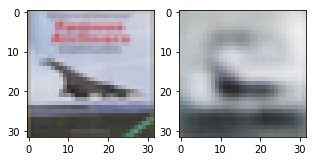

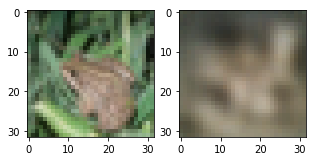

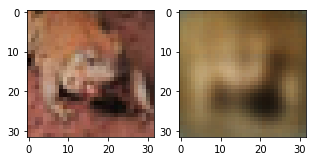

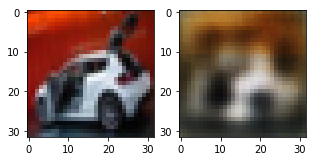

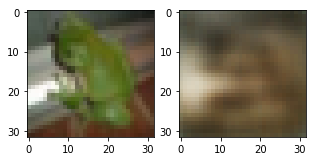

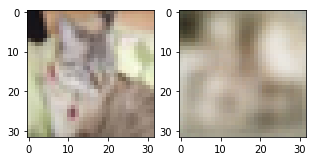

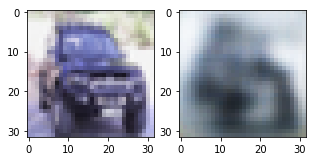

In [7]:
%matplotlib inline
#sample test
SAMPLE_COUNT = 10
for index in range(SAMPLE_COUNT):
    plt.figure(figsize=(5,5))
    data_image = X_test[index]
    image_origin = data_image
    ax = plt.subplot(1,2,1)
    ax.imshow(image_origin)
    ax.axis("off")
    image_coder = auto_encoder.predict(data_image[None,...])
    image_coder = np.squeeze(image_coder)
    ax = plt.subplot(1,2,2)
    ax.imshow(image_coder)
    ax.axis("off")
    plt.show()